<a href="https://colab.research.google.com/github/Omar-Abd-Elwahab/VCF_filter/blob/main/indel_model_t1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Opening the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!cp ./drive/MyDrive/Colab\ Notebooks/deepref/hg003_snps.csv $PWD
!cp ./drive/MyDrive/Colab\ Notebooks/deepref/hg003_indels.csv $PWD
!cp ./drive/MyDrive/Colab\ Notebooks/deepref/unique_words.txt /content


In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe.
#indels = pd.read_csv("hg003_indels.csv", low_memory=False)
#indels = indels[1:]
#print(indels.groupby('FILTER').size())
#snps = pd.read_csv("hg003_snps.csv", low_memory=False)
#snps = snps[1:]
#print(snps.groupby('FILTER').size())

#df = snps.append(indels)
#print(df.groupby('FILTER').size())
#df.sample(3)

In [ ]:
#!head -250 ./drive/MyDrive/Colab\ Notebooks/deepref/HG003_GRCh38_1_22_v4.2.1_benchmark.vcf

In [ ]:
pwd

'/content'

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 94.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.3 MB/s eta 0:00:00


In [ ]:
!tail -45 unique_words.txt > ww.txt

In [ ]:
ww = open('ww.txt')
never_split = ww.readlines()
res = []
for sub in never_split:
    res.append(sub.replace("\n", ""))
res


['indel',
 'idv',
 'imf',
 'dp',
 'vdb',
 'rpbz',
 'mqbz',
 'bqbz',
 'mqsbz',
 'scbz',
 'fs',
 'sgb',
 'mq0f',
 'dp4',
 'mq',
 'mmlq',
 'tcr',
 'ws',
 'nf',
 'tcf',
 'mgof',
 'sbpval',
 'readposranksum',
 'qd',
 'brf',
 'hapscore',
 'gq',
 'gof',
 'gl',
 'nv',
 'badreads',
 'allelebias',
 'hp10',
 'q20',
 'strandbias',
 'qualdepth',
 'refcall',
 'baseqranksum',
 'excesshet',
 'inbreedingcoeff',
 'mleac',
 'mleaf',
 'mqranksum',
 'sor',
 'lowqual']

In [ ]:
#from transformers import BertTokenizer, BertForSequenceClassification, BertConfig

# Step 1: Tokenization


#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#for word in words:
#  tokenizer.add_tokens(word)
#  # Step 2: Vocabulary Creation
#  tokenizer.save_vocabulary(word.lower())

# Step 3: Model Configuration
#config = BertConfig.from_pretrained('bert-base-uncased')
#config.vocab_size = len(tokenizer)

# Step 4: Model Initialization
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', config=config, ignore_mismatched_sizes=True)
#model.resize_token_embeddings(len(tokenizer))

# Step 5: Fine-tuning
# Adjust your fine-tuning code accordingly, using the modified tokenizer and model




In [ ]:
from transformers import BertConfig, BertModel, BertTokenizer,  BertForSequenceClassification



In [ ]:
tokenizer = BertTokenizer("unique_words.txt", do_lower_case = True,
                          do_basic_tokenize = True, never_split = res,
                          unk_token = '[UNK]', sep_token = '[SEP]', pad_token = '[PAD]',
                          cls_token = '[CLS]', mask_token = '[MASK]',
                          tokenize_chinese_chars = False, strip_accents = None)
config = BertConfig(vocab_size = len(tokenizer), hidden_size = 256,
                           num_hidden_layers = 8, num_attention_heads = 8,
                           intermediate_size = 1024, hidden_act = 'gelu',
                           hidden_dropout_prob = 0.1, attention_probs_dropout_prob = 0.1,
                           max_position_embeddings = 512,
                           initializer_range = 0.02, layer_norm_eps = 1e-12,
                           pad_token_id = 0, position_embedding_type = 'absolute',
                           use_cache = False, classifier_dropout = 0.1, num_labels=2,
                           output_attentions = False, # Whether the model returns attentions weights.
                           output_hidden_states = False, # Whether the model returns all hidden-states.
)
model =  BertForSequenceClassification(config)


In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("hg003_indels.csv", low_memory=False)
df = df.drop(df.columns[[0, 1, 2]], axis=1)

df.sample(3)

,QUAL,FILTER,INFO,FORMAT,HG003
643793,435,0,FR=1.0;MMLQ=38.0;TCR=6;HP=1;WE=71398522;Source...,GT:GL:GOF:GQ:NR:NV,"1/1:-48.8,-1.81,0.0:0.0:18:7:7"
1363264,190.416,1,INDEL;IDV=4;IMF=1.0;DP=4;VDB=0.0949329;FS=0.0;...,GT:PL,"1/1:220,12,0"
837083,4.58869,1,INDEL;IDV=2;IMF=0.2;DP=10;VDB=0.510154;RPBZ=1....,GT:PL,"0/1:35,0,35"


In [ ]:
df=df[1:]

In [ ]:
df.groupby('FILTER').size()

FILTER
0    1421173
1     795154
dtype: int64

In [ ]:
df = df.sample(1000000, random_state=42)

In [ ]:
df.groupby('FILTER').size()

FILTER
0    641692
1    358308
dtype: int64

In [ ]:

# Assuming you have a DataFrame called 'df' with columns 'col1', 'col2', 'col3', and 'col_to_exclude'

# Get all column names except the one to exclude
columns_to_merge = [col for col in df.columns if col != 'FILTER']

# Define a lambda function to merge the values of selected columns
merge_columns = lambda row: ' '.join(str(row[col]) for col in columns_to_merge)

# Merge columns using the defined function
df['merged_column'] = df.apply(merge_columns, axis=1)

# Drop the original columns
df = df.drop(columns=columns_to_merge)

# Print the resulting DataFrame
print(df.sample(3))


       FILTER                                      merged_column
408617      0  261 FR=1.0;MMLQ=34.0;TCR=2;HP=4;WE=125319219;S...
257413      0  271 FR=0.5;MMLQ=38.0;TCR=3;HP=2;WE=6014182;Sou...
14934       0  120 FR=0.5;MMLQ=37.0;TCR=3;HP=4;WE=62827815;So...


In [ ]:
# Get the lists of sentences and their labels.
sentences = df.merged_column.values
labels = df.FILTER.values

In [ ]:
import numpy as np

In [ ]:
labels = labels.astype(np.int64)

In [ ]:
#labels = labels.astype(np.int8)

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  42.6 AC=1;AF=0.5;AN=2;BaseQRankSum=0.0;DP=5;ExcessHet=0.0;FS=0.0;MLEAC=1;MLEAF=0.5;MQ=60.0;MQRankSum=0.0;QD=10.65;ReadPosRankSum=1.383;SOR=0.693 GT:AD:DP:GQ:PL 0/1:2,2:4:50:50,0,50
Tokenized:  ['42', '.', '6', 'ac', '=', '1', ';', 'af', '=', '0', '.', '5', ';', 'an', '=', '2', ';', 'baseqranksum', '=', '0', '.', '0', ';', 'dp', '=', '5', ';', 'excesshet', '=', '0', '.', '0', ';', 'fs', '=', '0', '.', '0', ';', 'mleac', '=', '1', ';', 'mleaf', '=', '0', '.', '5', ';', 'mq', '=', '60', '.', '0', ';', 'mqranksum', '=', '0', '.', '0', ';', 'qd', '=', '10', '.', '65', ';', 'readposranksum', '=', '1', '.', '38', '##3', ';', 'sor', '=', '0', '.', '69', '##3', 'gt', ':', 'ad', ':', 'dp', ':', 'gq', ':', 'pl', '0', '/', '1', ':', '2', ',', '2', ':', '4', ':', '50', ':', '50', ',', '0', ',', '50']
Token IDs:  [4413, 1012, 1020, 9353, 1027, 1015, 1025, 21358, 1027, 1014, 1012, 1019, 1025, 2019, 1027, 1016, 1025, 30559, 1027, 1014, 1012, 1014, 1025, 30525, 1027, 1019, 1025, 30560, 1027

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  42.6 AC=1;AF=0.5;AN=2;BaseQRankSum=0.0;DP=5;ExcessHet=0.0;FS=0.0;MLEAC=1;MLEAF=0.5;MQ=60.0;MQRankSum=0.0;QD=10.65;ReadPosRankSum=1.383;SOR=0.693 GT:AD:DP:GQ:PL 0/1:2,2:4:50:50,0,50
Token IDs: [101, 4413, 1012, 1020, 9353, 1027, 1015, 1025, 21358, 1027, 1014, 1012, 1019, 1025, 2019, 1027, 1016, 1025, 30559, 1027, 1014, 1012, 1014, 1025, 30525, 1027, 1019, 1025, 30560, 1027, 1014, 1012, 1014, 1025, 30532, 1027, 1014, 1012, 1014, 1025, 30562, 1027, 1015, 1025, 30563, 1027, 1014, 1012, 1019, 1025, 30536, 1027, 3438, 1012, 1014, 1025, 30564, 1027, 1014, 1012, 1014, 1025, 30545, 1027, 2184, 1012, 3515, 1025, 30544, 1027, 1015, 1012, 4229, 2509, 1025, 30565, 1027, 1014, 1012, 6353, 2509, 14181, 1024, 4748, 1024, 30525, 1024, 30548, 1024, 20228, 1014, 1013, 1015, 1024, 1016, 1010, 1016, 1024, 1018, 1024, 2753, 1024, 2753, 1010, 1014, 1010, 2753, 102]


In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  198


In [ ]:
# We'll borrow the `pad_sequences` utility function to do this.
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 200

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long",
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 200 values...

Padding token: "[PAD]", ID: 0

Done.


In [ ]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:

    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]

    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [ ]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 80% for training and 20% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
                                                            random_state=42, test_size=0.4)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=42, test_size=0.4)

In [ ]:
import tensorflow as tf
import torch
import numpy as np


# Convert all inputs and labels into torch tensors, the required datatype
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 750

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [ ]:

# Tell pytorch to run this model on the GPU.
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30567, 256, padding_idx=0)
      (position_embeddings): Embedding(512, 256)
      (token_type_embeddings): Embedding(2, 256)
      (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-7): 8 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=256, out_features=256, bias=True)
              (LayerNorm): LayerNorm((256,), eps=1e-12, e

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 137 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30567, 256)
bert.embeddings.position_embeddings.weight                (512, 256)
bert.embeddings.token_type_embeddings.weight                (2, 256)
bert.embeddings.LayerNorm.weight                              (256,)
bert.embeddings.LayerNorm.bias                                (256,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (256, 256)
bert.encoder.layer.0.attention.self.query.bias                (256,)
bert.encoder.layer.0.attention.self.key.weight            (256, 256)
bert.encoder.layer.0.attention.self.key.bias                  (256,)
bert.encoder.layer.0.attention.self.value.weight          (256, 256)
bert.encoder.layer.0.attention.self.value.bias                (256,)
bert.encoder.layer.0.attention.output.dense.weight        (256, 256)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 30

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))



======== Epoch 1 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:16.
  Batch   200  of    800.    Elapsed: 0:02:29.
  Batch   300  of    800.    Elapsed: 0:03:43.
  Batch   400  of    800.    Elapsed: 0:04:56.
  Batch   500  of    800.    Elapsed: 0:06:08.
  Batch   600  of    800.    Elapsed: 0:07:21.
  Batch   700  of    800.    Elapsed: 0:08:33.

  Average training loss: 0.53710
  Training epcoh took: 0:09:48

Running Validation...
Confusion Matrix:
[[241777  15147]
 [ 75611  67465]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84    256924
           1       0.82      0.47      0.60    143076

    accuracy                           0.77    400000
   macro avg       0.79      0.71      0.72    400000
weighted avg       0.78      0.77      0.75    400000

Accuracy score:
0.773105
Weighted precision_recall_f1score:
(0.7814003330153588, 0.773105, 0.7546551547698745, None)
  Accuracy: 0.7731

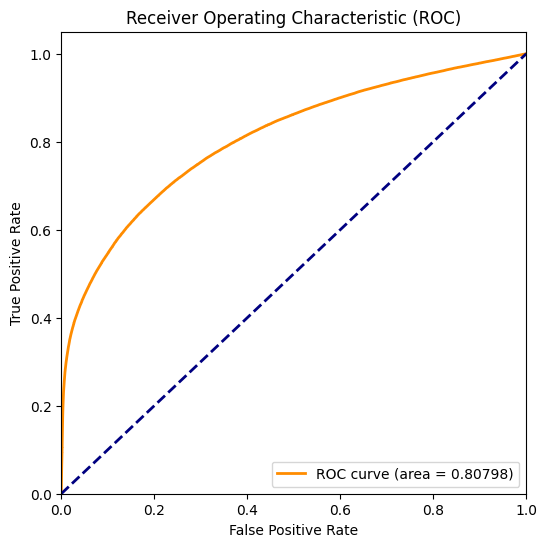


======== Epoch 2 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:38.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:30.

  Average training loss: 0.48193
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[237944  18980]
 [ 66776  76300]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85    256924
           1       0.80      0.53      0.64    143076

    accuracy                           0.79    400000
   macro avg       0.79      0.73      0.74    400000
weighted avg       0.79      0.79      0.77    400000

Accuracy score:
0.78561
Weighted precision_recall_f1score:
(0.7879922160450556, 0.78561, 0.7732371868839967, None)
  Accuracy: 0.78561


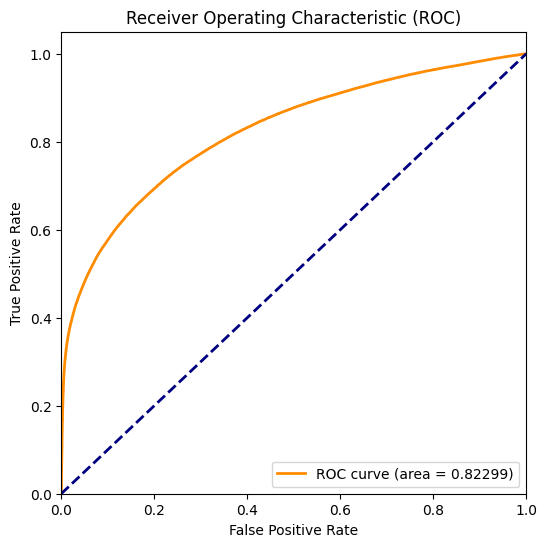


======== Epoch 3 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:38.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:30.

  Average training loss: 0.46946
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[239409  17515]
 [ 66126  76950]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85    256924
           1       0.81      0.54      0.65    143076

    accuracy                           0.79    400000
   macro avg       0.80      0.73      0.75    400000
weighted avg       0.79      0.79      0.78    400000

Accuracy score:
0.7908975
Weighted precision_recall_f1score:
(0.7946665947903586, 0.7908975, 0.7785377949971124, None)
  Accuracy: 0.79

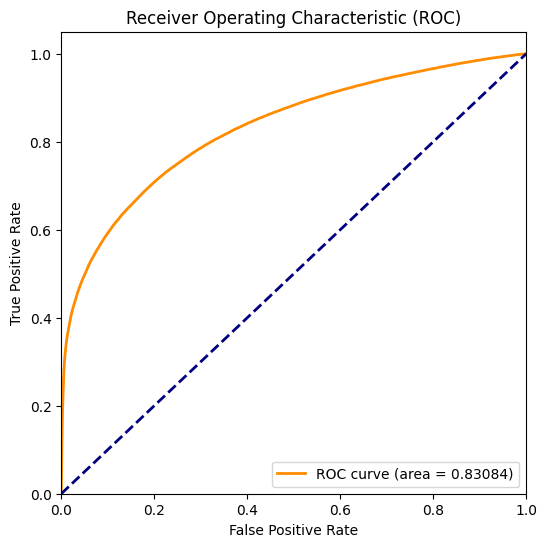


======== Epoch 4 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:38.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:30.

  Average training loss: 0.45981
  Training epcoh took: 0:09:42

Running Validation...
Confusion Matrix:
[[242996  13928]
 [ 68577  74499]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.78      0.95      0.85    256924
           1       0.84      0.52      0.64    143076

    accuracy                           0.79    400000
   macro avg       0.81      0.73      0.75    400000
weighted avg       0.80      0.79      0.78    400000

Accuracy score:
0.7937375
Weighted precision_recall_f1score:
(0.8022888183044842, 0.7937375, 0.7793060533230342, None)
  Accuracy: 0.79

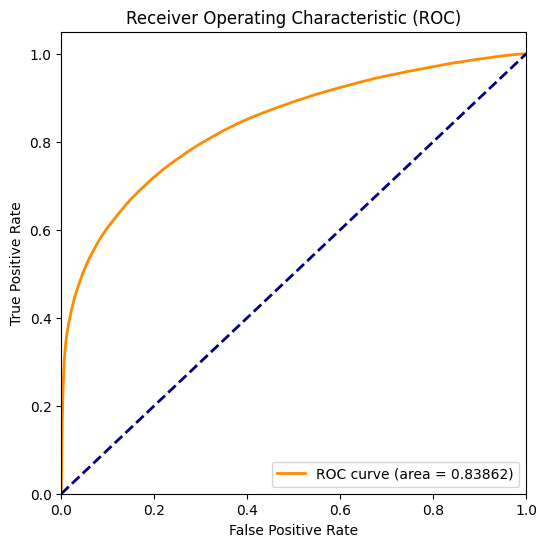


======== Epoch 5 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:38.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:30.

  Average training loss: 0.45064
  Training epcoh took: 0:09:42

Running Validation...
Confusion Matrix:
[[242018  14906]
 [ 65728  77348]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86    256924
           1       0.84      0.54      0.66    143076

    accuracy                           0.80    400000
   macro avg       0.81      0.74      0.76    400000
weighted avg       0.81      0.80      0.79    400000

Accuracy score:
0.798415
Weighted precision_recall_f1score:
(0.8050222514151881, 0.798415, 0.7857194230967693, None)
  Accuracy: 0.7984

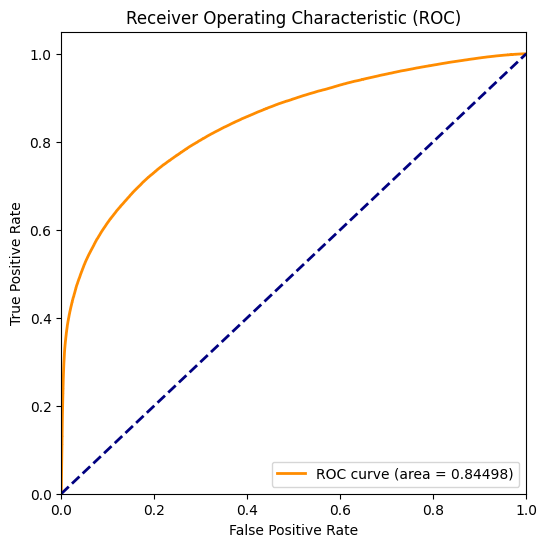


======== Epoch 6 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:38.
  Batch   400  of    800.    Elapsed: 0:04:50.
  Batch   500  of    800.    Elapsed: 0:06:04.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:30.

  Average training loss: 0.44448
  Training epcoh took: 0:09:42

Running Validation...
Confusion Matrix:
[[243947  12977]
 [ 67381  75695]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86    256924
           1       0.85      0.53      0.65    143076

    accuracy                           0.80    400000
   macro avg       0.82      0.74      0.76    400000
weighted avg       0.81      0.80      0.79    400000

Accuracy score:
0.799105
Weighted precision_recall_f1score:
(0.8086369293265901, 0.799105, 0.7851412126192963, None)
  Accuracy: 0.7991

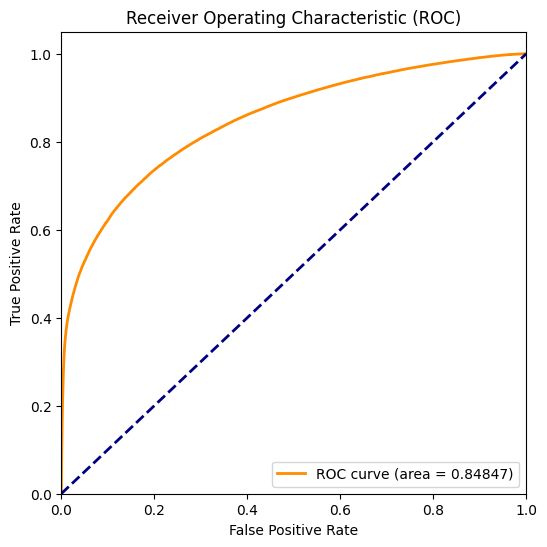


======== Epoch 7 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:14.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:06.
  Batch   600  of    800.    Elapsed: 0:07:19.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.43983
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[235348  21576]
 [ 57042  86034]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86    256924
           1       0.80      0.60      0.69    143076

    accuracy                           0.80    400000
   macro avg       0.80      0.76      0.77    400000
weighted avg       0.80      0.80      0.80    400000

Accuracy score:
0.803455
Weighted precision_recall_f1score:
(0.8029750509664766, 0.803455, 0.7958967023376269, None)
  Accuracy: 0.8034

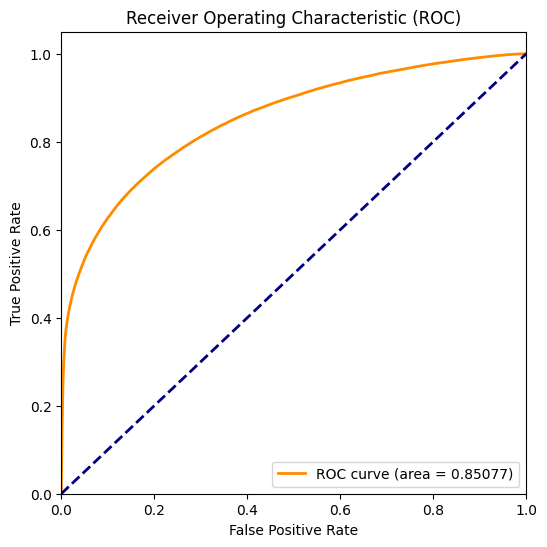


======== Epoch 8 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:14.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:06.
  Batch   600  of    800.    Elapsed: 0:07:19.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.43615
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[236005  20919]
 [ 58098  84978]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86    256924
           1       0.80      0.59      0.68    143076

    accuracy                           0.80    400000
   macro avg       0.80      0.76      0.77    400000
weighted avg       0.80      0.80      0.79    400000

Accuracy score:
0.8024575
Weighted precision_recall_f1score:
(0.8024576887592595, 0.8024575, 0.7943723568461559, None)
  Accuracy: 0.80

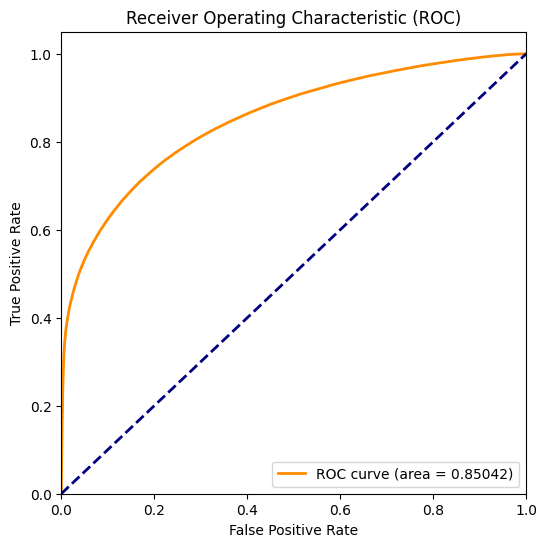


======== Epoch 9 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:14.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:19.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.43284
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[235183  21741]
 [ 56181  86895]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86    256924
           1       0.80      0.61      0.69    143076

    accuracy                           0.81    400000
   macro avg       0.80      0.76      0.77    400000
weighted avg       0.80      0.81      0.80    400000

Accuracy score:
0.805195
Weighted precision_recall_f1score:
(0.8045659219280797, 0.805195, 0.797986306029783, None)
  Accuracy: 0.80521

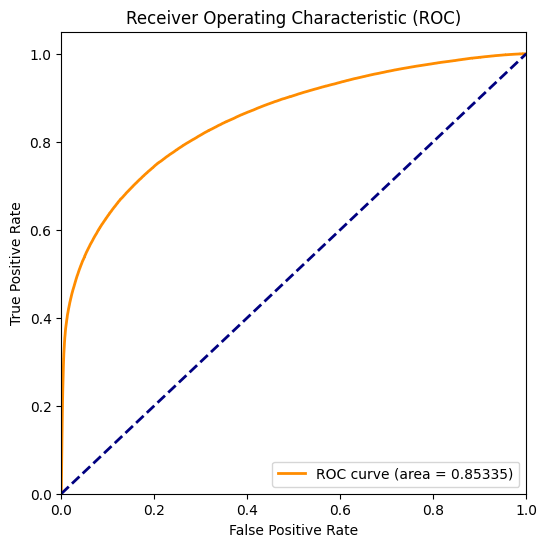


======== Epoch 10 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:14.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:19.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.42997
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[240719  16205]
 [ 61296  81780]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86    256924
           1       0.83      0.57      0.68    143076

    accuracy                           0.81    400000
   macro avg       0.82      0.75      0.77    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8062475
Weighted precision_recall_f1score:
(0.8104831625714904, 0.8062475, 0.7959418286008396, None)
  Accuracy: 0.8

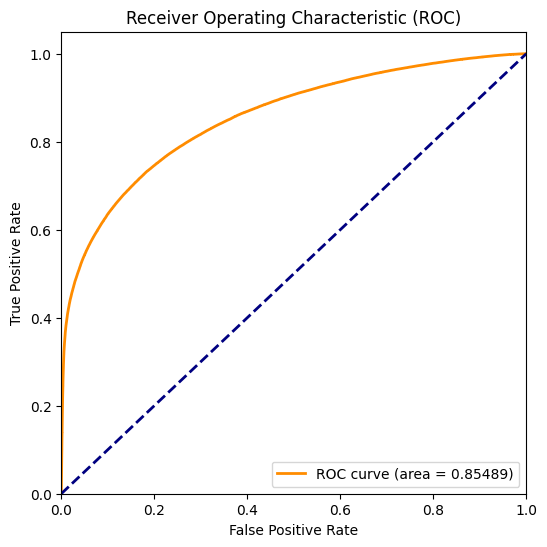


======== Epoch 11 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:19.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.42772
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[235890  21034]
 [ 56095  86981]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86    256924
           1       0.81      0.61      0.69    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.76      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8071775
Weighted precision_recall_f1score:
(0.8069481853035279, 0.8071775, 0.7998733201661877, None)
  Accuracy: 0.8

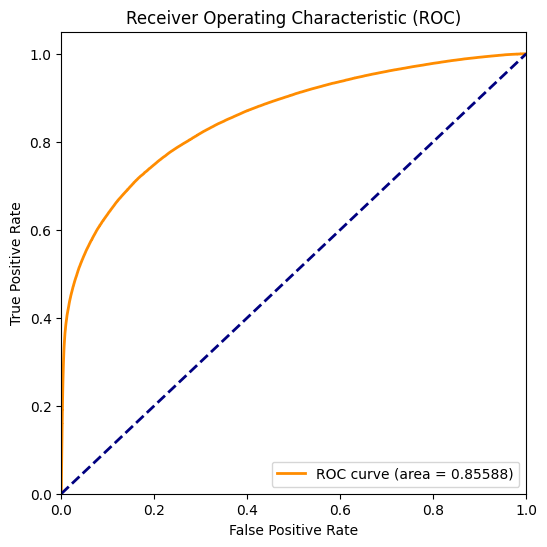


======== Epoch 12 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:19.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.42560
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[235852  21072]
 [ 56008  87068]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86    256924
           1       0.81      0.61      0.69    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.76      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8073
Weighted precision_recall_f1score:
(0.8070416228988436, 0.8073, 0.8000345522005416, None)
  Accuracy: 0.80732
 

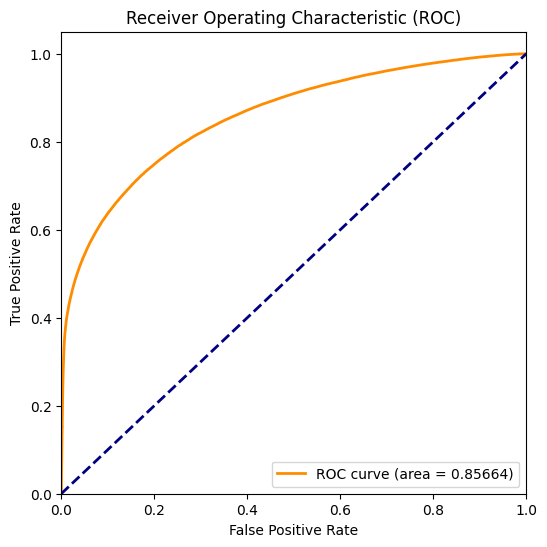


======== Epoch 13 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.42323
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[238501  18423]
 [ 58330  84746]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86    256924
           1       0.82      0.59      0.69    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.76      0.77    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8081175
Weighted precision_recall_f1score:
(0.809907133637362, 0.8081175, 0.7994831705544786, None)
  Accuracy: 0.80

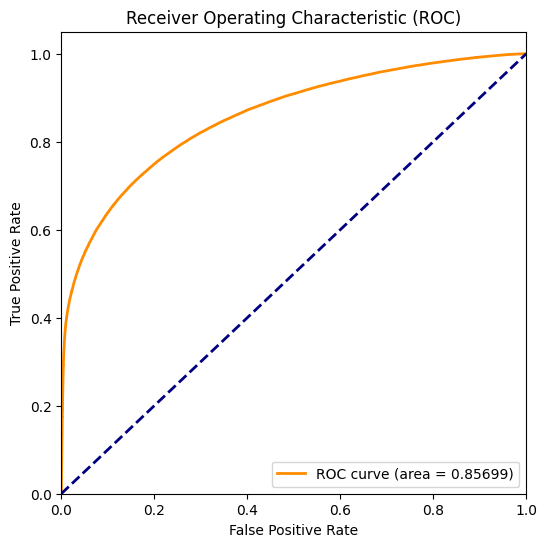


======== Epoch 14 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.42146
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[239893  17031]
 [ 60134  82942]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86    256924
           1       0.83      0.58      0.68    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.76      0.77    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8070875
Weighted precision_recall_f1score:
(0.8103280516396351, 0.8070875, 0.7974465211943857, None)
  Accuracy: 0.8

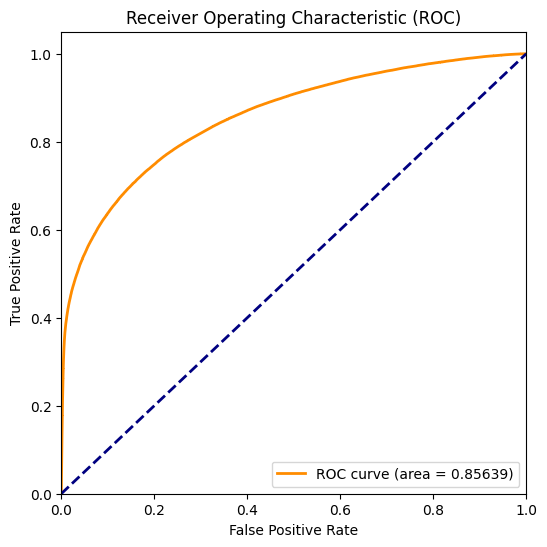


======== Epoch 15 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.41951
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[235162  21762]
 [ 54677  88399]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86    256924
           1       0.80      0.62      0.70    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.77      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8089025
Weighted precision_recall_f1score:
(0.8081700494249224, 0.8089025, 0.8022353662464345, None)
  Accuracy: 0.8

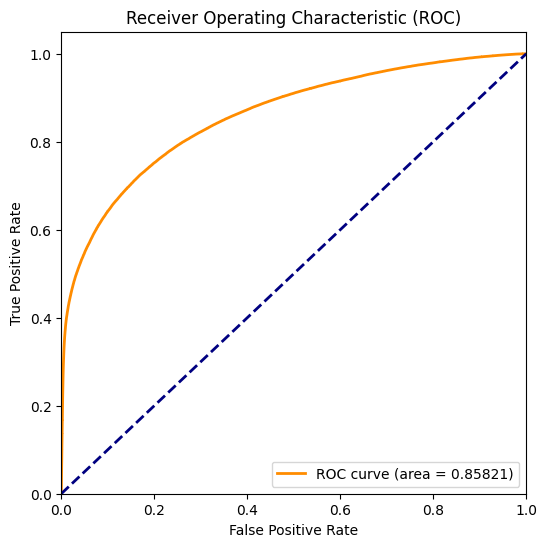


======== Epoch 16 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.41815
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[240348  16576]
 [ 59935  83141]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86    256924
           1       0.83      0.58      0.68    143076

    accuracy                           0.81    400000
   macro avg       0.82      0.76      0.77    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8087225
Weighted precision_recall_f1score:
(0.8123391410222451, 0.8087225, 0.7990850464176248, None)
  Accuracy: 0.8

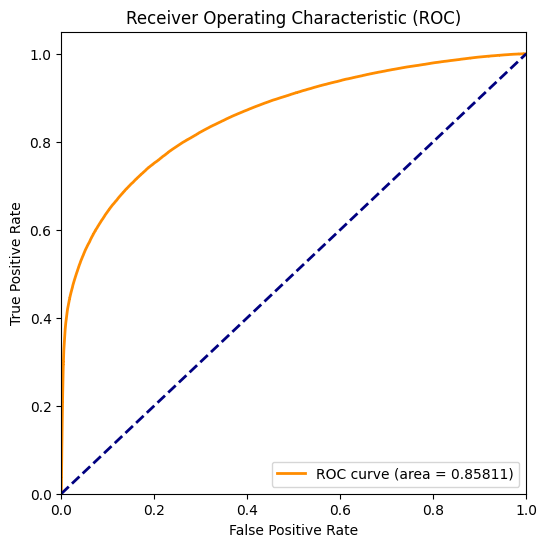


======== Epoch 17 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:30.

  Average training loss: 0.41626
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[238892  18032]
 [ 58304  84772]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86    256924
           1       0.82      0.59      0.69    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.76      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.80916
Weighted precision_recall_f1score:
(0.8112519857412137, 0.80916, 0.8004663014644071, None)
  Accuracy: 0.80917

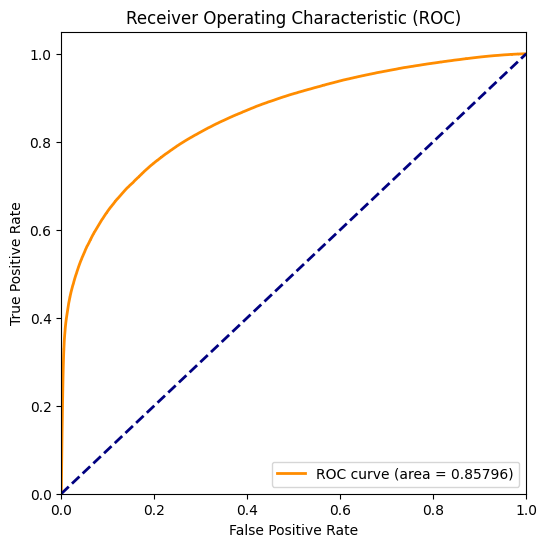


======== Epoch 18 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:30.

  Average training loss: 0.41482
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[236041  20883]
 [ 55160  87916]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86    256924
           1       0.81      0.61      0.70    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.77      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8098925
Weighted precision_recall_f1score:
(0.8096766683597953, 0.8098925, 0.8029010743366372, None)
  Accuracy: 0.8

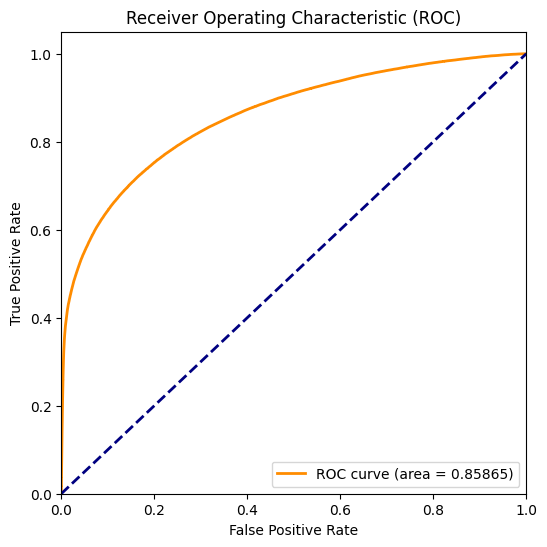


======== Epoch 19 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:38.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:30.

  Average training loss: 0.41348
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[237197  19727]
 [ 56375  86701]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86    256924
           1       0.81      0.61      0.69    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.76      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.809745
Weighted precision_recall_f1score:
(0.8103566458456913, 0.809745, 0.8021052414229953, None)
  Accuracy: 0.809

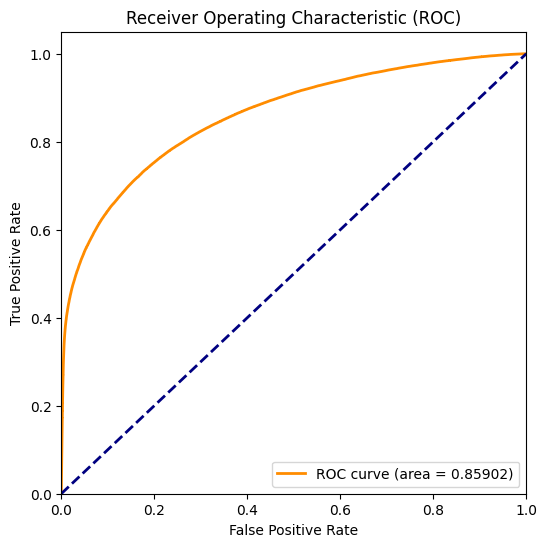


======== Epoch 20 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:38.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:30.

  Average training loss: 0.41213
  Training epcoh took: 0:09:42

Running Validation...
Confusion Matrix:
[[238159  18765]
 [ 57223  85853]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86    256924
           1       0.82      0.60      0.69    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.76      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.81003
Weighted precision_recall_f1score:
(0.8114105050813983, 0.81003, 0.8018962001314061, None)
  Accuracy: 0.81002

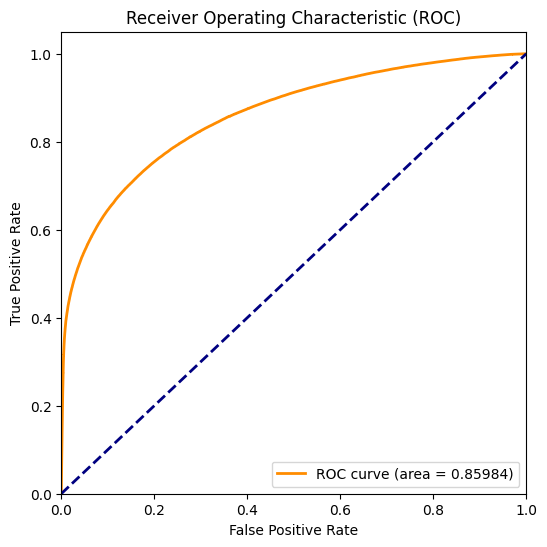


======== Epoch 21 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:38.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:30.

  Average training loss: 0.41108
  Training epcoh took: 0:09:42

Running Validation...
Confusion Matrix:
[[238680  18244]
 [ 57769  85307]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86    256924
           1       0.82      0.60      0.69    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.76      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8099675
Weighted precision_recall_f1score:
(0.811813932871268, 0.8099675, 0.8015265741064087, None)
  Accuracy: 0.80

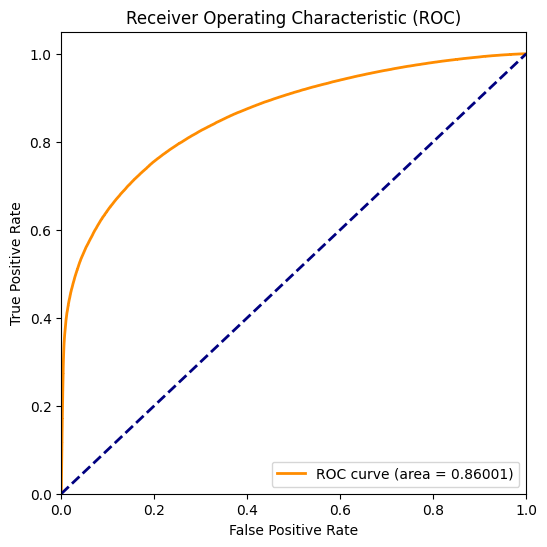


======== Epoch 22 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:38.
  Batch   400  of    800.    Elapsed: 0:04:51.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:30.

  Average training loss: 0.40956
  Training epcoh took: 0:09:42

Running Validation...
Confusion Matrix:
[[235914  21010]
 [ 54803  88273]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86    256924
           1       0.81      0.62      0.70    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.77      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8104675
Weighted precision_recall_f1score:
(0.8101512521752453, 0.8104675, 0.8036251912863941, None)
  Accuracy: 0.8

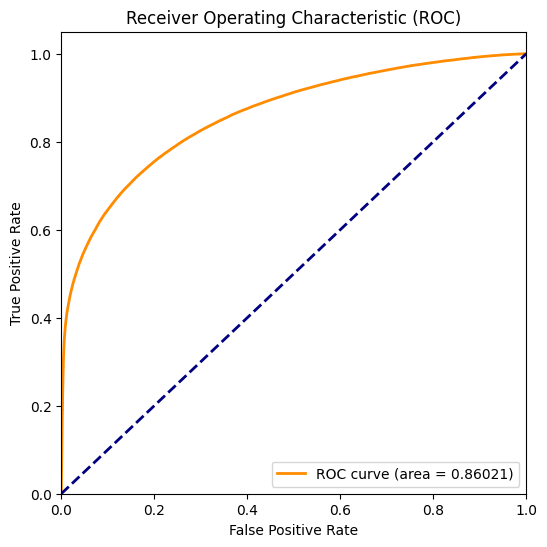


======== Epoch 23 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:38.
  Batch   400  of    800.    Elapsed: 0:04:50.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:30.

  Average training loss: 0.40879
  Training epcoh took: 0:09:42

Running Validation...
Confusion Matrix:
[[235927  20997]
 [ 55088  87988]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86    256924
           1       0.81      0.61      0.70    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.77      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8097875
Weighted precision_recall_f1score:
(0.8095008410614785, 0.8097875, 0.8028416787057443, None)
  Accuracy: 0.8

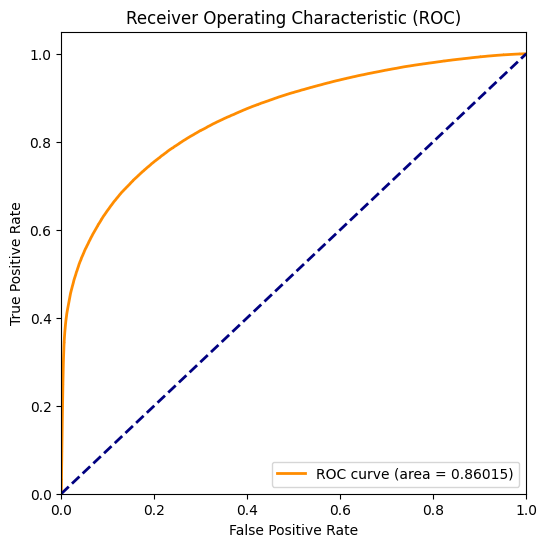


======== Epoch 24 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:14.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:06.
  Batch   600  of    800.    Elapsed: 0:07:19.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.40769
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[238622  18302]
 [ 57587  85489]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86    256924
           1       0.82      0.60      0.69    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.76      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8102775
Weighted precision_recall_f1score:
(0.8120530119959491, 0.8102775, 0.8019191264168889, None)
  Accuracy: 0.8

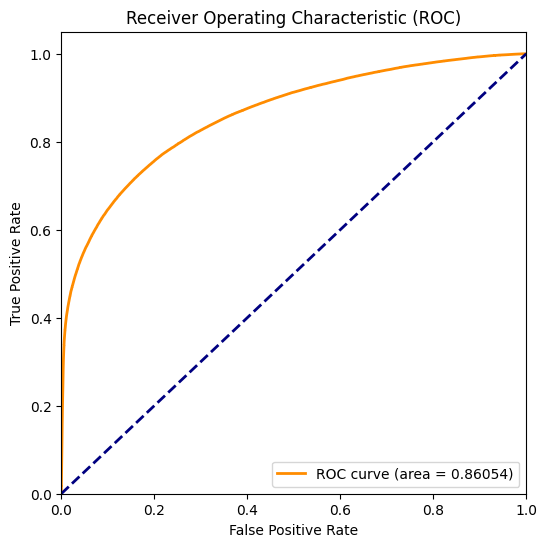


======== Epoch 25 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:14.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:19.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.40674
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[239182  17742]
 [ 58378  84698]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86    256924
           1       0.83      0.59      0.69    143076

    accuracy                           0.81    400000
   macro avg       0.82      0.76      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8097
Weighted precision_recall_f1score:
(0.8120360558611315, 0.8097, 0.8009246504013613, None)
  Accuracy: 0.80968
 

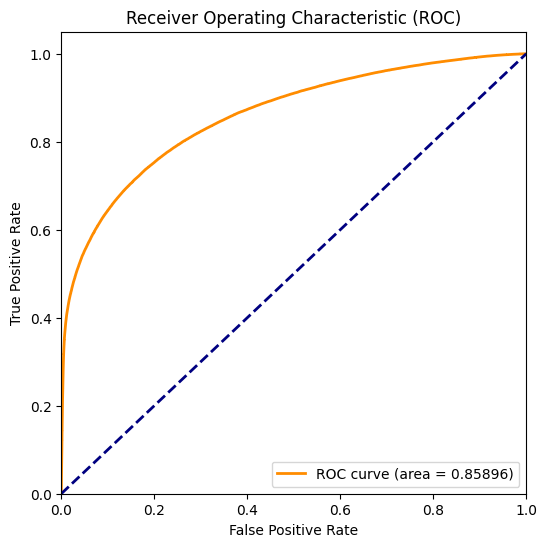


======== Epoch 26 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:14.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:19.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.40564
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[239178  17746]
 [ 58239  84837]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86    256924
           1       0.83      0.59      0.69    143076

    accuracy                           0.81    400000
   macro avg       0.82      0.76      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8100375
Weighted precision_recall_f1score:
(0.8123480659361213, 0.8100375, 0.8013194479182543, None)
  Accuracy: 0.8

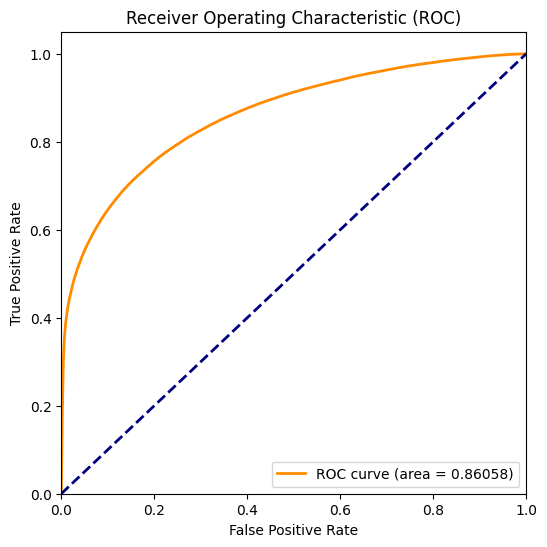


======== Epoch 27 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:19.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.40515
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[236687  20237]
 [ 55685  87391]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86    256924
           1       0.81      0.61      0.70    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.77      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.810195
Weighted precision_recall_f1score:
(0.8104105358543503, 0.810195, 0.8029007631989126, None)
  Accuracy: 0.810

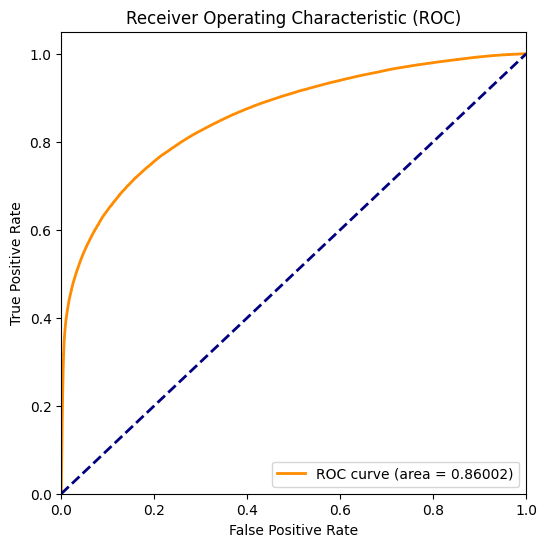


======== Epoch 28 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:19.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.40443
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[235024  21900]
 [ 54103  88973]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86    256924
           1       0.80      0.62      0.70    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.77      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8099925
Weighted precision_recall_f1score:
(0.8091553901376867, 0.8099925, 0.8035479603954407, None)
  Accuracy: 0.8

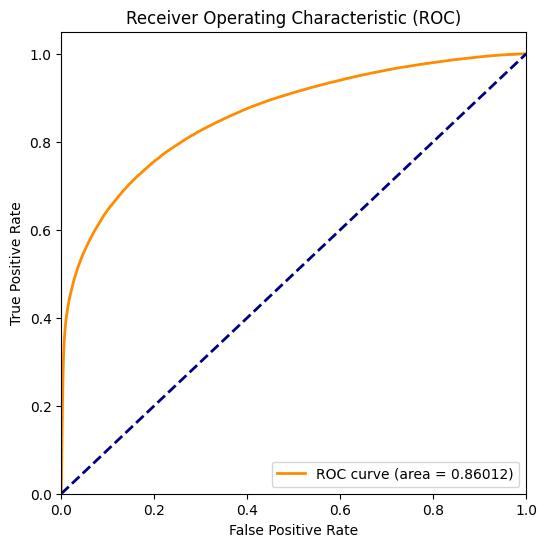


======== Epoch 29 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.40375
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[237029  19895]
 [ 56010  87066]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86    256924
           1       0.81      0.61      0.70    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.77      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.8102375
Weighted precision_recall_f1score:
(0.8107009090524001, 0.8102375, 0.8027636499452242, None)
  Accuracy: 0.8

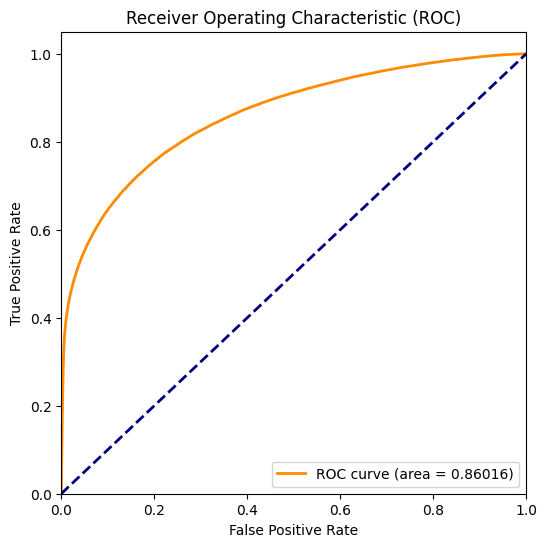


======== Epoch 30 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:27.
  Batch   300  of    800.    Elapsed: 0:03:39.
  Batch   400  of    800.    Elapsed: 0:04:52.
  Batch   500  of    800.    Elapsed: 0:06:05.
  Batch   600  of    800.    Elapsed: 0:07:17.
  Batch   700  of    800.    Elapsed: 0:08:31.

  Average training loss: 0.40303
  Training epcoh took: 0:09:44

Running Validation...
Confusion Matrix:
[[237013  19911]
 [ 56063  87013]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86    256924
           1       0.81      0.61      0.70    143076

    accuracy                           0.81    400000
   macro avg       0.81      0.77      0.78    400000
weighted avg       0.81      0.81      0.80    400000

Accuracy score:
0.810065
Weighted precision_recall_f1score:
(0.8105237056701131, 0.810065, 0.8025742398690908, None)
  Accuracy: 0.810

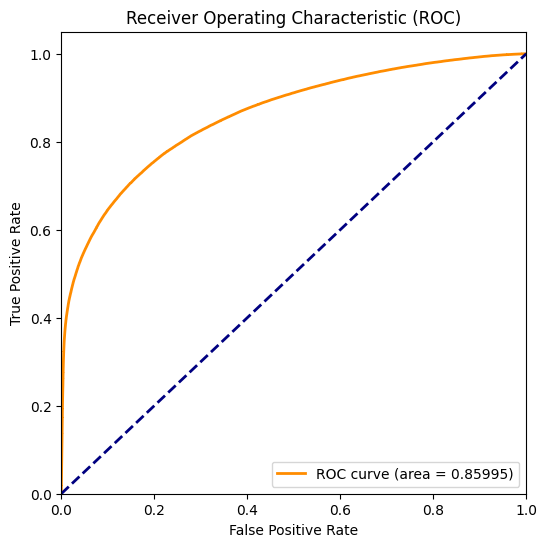


Training complete!


In [ ]:
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []
val_values = []

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here:
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # The call to `model` always returns a tuple, so we need to pull the
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()


    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.5f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Initialize variables for the confusion matrix
    all_preds = []
    all_labels = []
    all_probabilities = []

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here:
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

        # Append predictions and labels to calculate the confusion matrix
        all_preds.extend(np.argmax(logits, axis=1))
        all_labels.extend(label_ids)

        # Append probability scores for ROC curve
        probabilities = torch.softmax(torch.from_numpy(logits), dim=1)
        all_probabilities.extend(probabilities[:, 1].cpu().numpy())

    # Calculate the confusion matrix
    confusion = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(confusion)
    print("Classification reporet:")
    print(classification_report(all_labels, all_preds))
    print("Accuracy score:")
    print(accuracy_score(all_labels, all_preds))
    print("Weighted precision_recall_f1score:")
    print(precision_recall_fscore_support(all_labels, all_preds, average = 'weighted'))

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.5f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
    val_values.append(eval_accuracy/nb_eval_steps)

    # Calculate ROC AUC score and plot ROC curve
    roc_auc = roc_auc_score(all_labels, all_probabilities)
    fpr, tpr, _ = roc_curve(all_labels, all_probabilities)

    print("ROC AUC Score: {:.5f}".format(roc_auc))

    # Plot ROC curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.5f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
print("")
print("Training complete!")

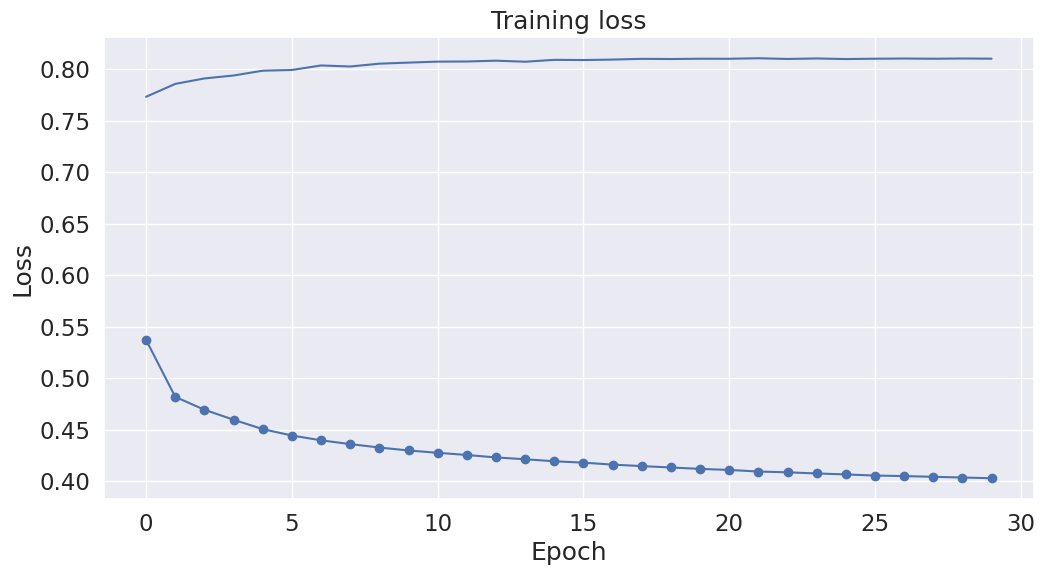

In [ ]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')
plt.plot(val_values, 'b')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './indel_model_save_t1/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
#torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to ./indel_model_save_t1/


('./indel_model_save_t1/tokenizer_config.json',
 './indel_model_save_t1/special_tokens_map.json',
 './indel_model_save_t1/vocab.txt',
 './indel_model_save_t1/added_tokens.json')

In [ ]:
!ls -lh ./indel_model_save_t1/

total 55M
-rw-r--r-- 1 root root   82 Oct  5 05:31 added_tokens.json
-rw-r--r-- 1 root root  650 Oct  5 05:31 config.json
-rw-r--r-- 1 root root  55M Oct  5 05:31 pytorch_model.bin
-rw-r--r-- 1 root root  125 Oct  5 05:31 special_tokens_map.json
-rw-r--r-- 1 root root 1.9K Oct  5 05:31 tokenizer_config.json
-rw-r--r-- 1 root root 227K Oct  5 05:31 vocab.txt


In [ ]:
!ls -l --block-size=M ./indel_model_save_t1/pytorch_model.bin

-rw-r--r-- 1 root root 55M Oct  5 05:31 ./indel_model_save_t1/pytorch_model.bin


In [ ]:
# Copy the model files to a directory in your Google Drive.
!cp -r ./indel_model_save_t1/ ./drive/MyDrive/Colab\ Notebooks/deepref/